# Model the number of rides per day by hubway station in Boston

In [31]:
import pandas as pd
from sklearn import linear_model
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np
from pylab import savefig

In [143]:
ridedata = pd.read_csv('../Data/Boston/FeaturesGroup4.csv')

In [144]:
ridedata.columns

Index([u'Unnamed: 0', u'stationid', u'duration', u'nrides', u'ndays', u'lat',
       u'lng', u'originpop', u'originwork', u'originsubway', u'destpop',
       u'destwork', u'destsubway', u'ridesperday'],
      dtype='object')

In [145]:
y = ridedata['ridesperday'].values
X = ridedata[['originpop', 'originwork','destpop','destwork','originsubway','destsubway']].values

In [146]:
clf = linear_model.LinearRegression()
#clf.fit(X_train, y_train)
#clf.coef_
#clf.score(X_test, y_test)
scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='median_absolute_error')

In [147]:
scores, scores.mean(), scores.std()

(array([-5.15259405, -7.75544599, -9.45910855, -8.68410996, -5.51618866]),
 -7.3134894431300381,
 1.7074757103184486)

In [148]:
X.shape

(142, 6)

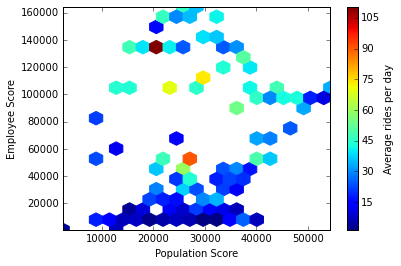

In [149]:
plt.hexbin(X[:,0], X[:, 1], C=y, gridsize=20)
cbar = plt.colorbar()
plt.xlabel('Population Score')
plt.ylabel('Employee Score')
cbar.set_label('Average rides per day')
savefig('../Figures/workpoprides_Group4.png')

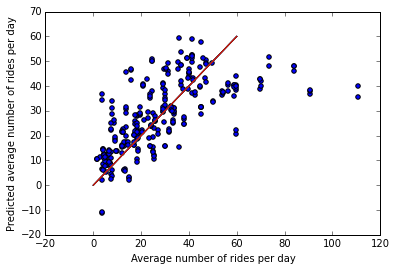

In [150]:
for isim in range(10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
         X, y, test_size=0.2)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.plot([0,60], [0,60])
    plt.xlabel('Average number of rides per day')
    plt.ylabel('Predicted average number of rides per day')
savefig('../Figures/ridesperdayregression_Group4.png')

In [97]:
ridedata.plot(x='start_day', y='nrides', figsize=(12,6))

KeyError: 'start_day'